In [2]:
#   SEGMENTACIÓN DE CLIENTES POR HÁBITOS DE COMPRA - Proyecto de visualización de datos
#   Realizado por Candida Alvarez Mangarré, el 24 de enero del 2024

In [3]:
#   Preguntas que buscamos responder con este conjunto

#. ¿Cual es la distribución de genero?
#. ¿Cual es la distribución de edades?
#. ¿Cuales son las 10 ubicaciones geograficas más frecuentes?
#. ¿Cual es la categoría de producto más popular?
#. ¿Cuales son los cinco productos mas vendidos?
#. ¿Cual fue el item mas vendido en cada locacion?
#. ¿Con que frecuencia los clientes usan cupones de promoción?
#. ¿Que tipo de despacho es usado con mayor frecuencia por los clientes?
#. ¿Cual es el porcentaje de clientes que utiliza Venmo como método de pago?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#   Asignamos la tabla a una variable

tabla = pd.read_csv('shopping_behavior_updated.csv')

In [6]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
tabla.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
#   DISTRIBUCIÓN DE GÉNERO
genero = tabla['Gender'].value_counts()
print(genero)

Gender
Male      2652
Female    1248
Name: count, dtype: int64


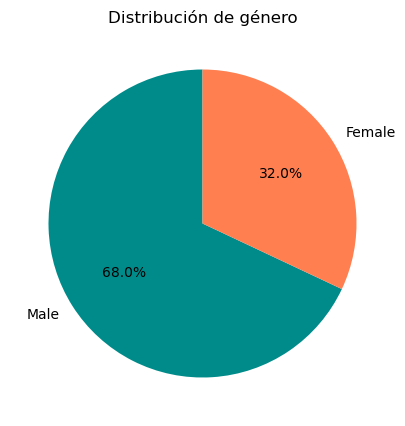

In [9]:
#   Nuestro set de datos contiene mas hombres que mujeres, creamos un gráfico de torta para visualizar 
#   su distribución

plt.figure(figsize=(5, 5))
plt.pie(genero, labels=genero.index, autopct='%1.1f%%', startangle=90, colors=['darkcyan', 'coral'])

plt.title('Distribución de género')

plt.show()

In [10]:
#   DISTRIBUCIÓN DE EDADES
edades = tabla['Age'].value_counts()
#print(edades)         

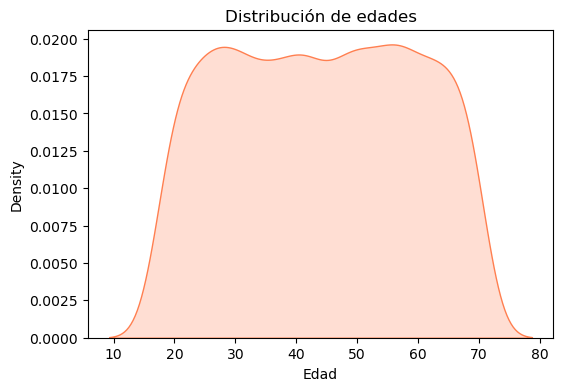

In [11]:
#   Notamos que las edades estan distribuidas de forma homogenea, y lo podemos explorar mejor con un grafico
#   de densidad de kernel. Cada edad tiene una probabilidad de aparición de aprox 2% en nuestro conjunto de datos
#   siendo el mínimo de 18 y el máximo de 70 años.

plt.figure(figsize=(6, 4))
sns.kdeplot(tabla['Age'], fill=True, color='coral')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.show()

In [12]:
#   10 UBICACIONES GEOGRÁFICAS MÁS FRECUENTES

ubicacion_frecuencias = tabla['Location'].value_counts().head(10)
print(ubicacion_frecuencias)

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: count, dtype: int64


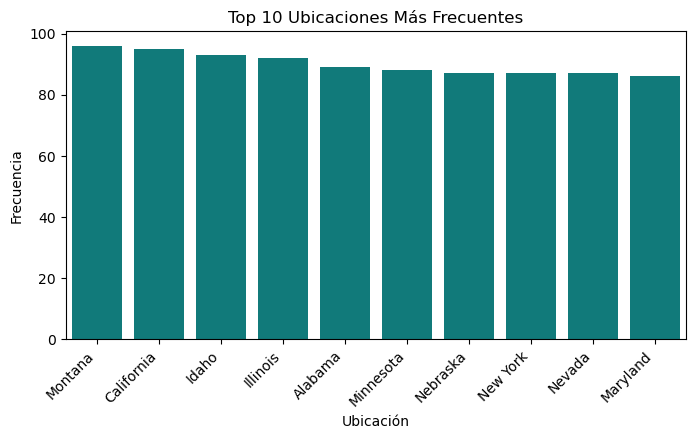

In [13]:
#   Utilizamos un grafico de barras para representar la información obtenida.

plt.figure(figsize=(8, 4))
sns.barplot(x=ubicacion_frecuencias.index, y=ubicacion_frecuencias.values, color = 'darkcyan')
plt.title('Top 10 Ubicaciones Más Frecuentes')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
#   CATEGORÍA DE PRODUCTO MÁS POPULAR

#   Notamos que la categoría más popular entre los clientes es la de ropa.

tabla['Category'].value_counts()


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [15]:
#   5 PRODUCTOS MAS VENDIDOS

tabla['Item Purchased'].value_counts().head(5)

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

In [21]:
#   ITEM MAS VENDIDO EN CADA LOCACIÓN

#   Segmentamos los datos del DataFrame 'tabla' segun la 'Location' y el 'Item Purchased' utilizamos .size() 
#   para contar el numero de ocurrencias por cada grupo, y .reset_index() para nombrar la columna que contiene 
#   el conteo.

frecuencia_de_items = tabla.groupby(['Location', 'Item Purchased']).size().reset_index(name='Frecuencia')
print(frecuencia_de_items)

     Location Item Purchased  Frecuencia
0     Alabama       Backpack           1
1     Alabama           Belt           2
2     Alabama         Blouse           4
3     Alabama          Boots           3
4     Alabama           Coat           6
...       ...            ...         ...
1194  Wyoming       Sneakers           6
1195  Wyoming          Socks           1
1196  Wyoming     Sunglasses           5
1197  Wyoming        Sweater           2
1198  Wyoming        T-shirt           2

[1199 rows x 3 columns]


In [25]:
#  Necesitamos solo los items con mayor frecuencia en cada locación, para eso utilizaremos .idxmax()

frecuencia_ordenada = frecuencia_de_items.loc[frecuencia_de_items.groupby('Location')['Frecuencia'].idxmax()]
print(frecuencia_ordenada)

            Location Item Purchased  Frecuencia
12           Alabama        Jewelry           8
25            Alaska       Backpack           5
49           Arizona       Backpack           5
79          Arkansas         Gloves           6
103       California          Dress           7
130         Colorado         Hoodie           6
148      Connecticut           Coat           6
180         Delaware          Pants           7
196          Florida           Coat           6
222          Georgia          Dress           8
248           Hawaii        Handbag           6
266            Idaho           Belt           8
306         Illinois          Shirt          10
332          Indiana          Skirt           6
360             Iowa        Sweater           7
364           Kansas         Blouse           6
389         Kentucky        Handbag           7
413        Louisiana         Hoodie           8
445            Maine          Shoes           7
472         Maryland          Skirt     

In [16]:
#   USO DE CÓDIGOS DE PROMOCIÓN

cod_promo = tabla['Promo Code Used'].value_counts()
print(cod_promo)

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64


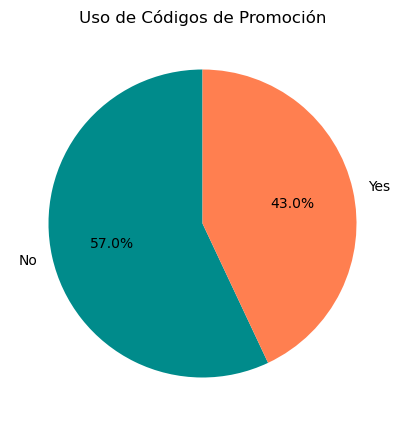

In [17]:
#   Notamos que la mayoría de los clientes no utilizan códigos de promoción

plt.figure(figsize=(5, 5))
plt.pie(cod_promo, labels=cod_promo.index, autopct='%1.1f%%', startangle=90, colors=['darkcyan', 'coral'])
plt.title('Uso de Códigos de Promoción')
plt.show()

In [20]:
#   TIPO DE DESPACHO MAS FRECUENTES

despacho = tabla['Shipping Type'].value_counts()
print(despacho)

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


In [27]:
#   CLIENTES QUE UTILIZAN VENMO

venmo = tabla['Payment Method'].value_counts()
print(venmo)

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


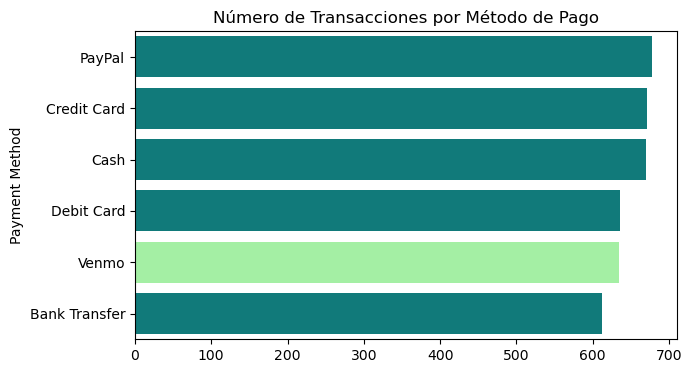

In [38]:
plt.figure(figsize=(7, 4))

color_general = 'darkcyan'
color_venmo = 'palegreen'

plot = sns.barplot(x=venmo.values, y=venmo.index, palette=[color_venmo if index == 'Venmo' else color_general for index in venmo.index])
plt.title('Número de Transacciones por Método de Pago')
plt.show()